In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(12345)

In [3]:
spot1 = stats.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
spot2 = stats.multivariate_normal([-0.5, 0.2], [[0.7, 0.5], [0.3, 0.2]])
def model(x, y):
    coords = np.dstack((x, y))
    return 3.02*spot1.pdf(coords) + 0.25*spot2.pdf(coords)

In [4]:
xlin = np.linspace(-1, 1, 100)
ylin = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xlin, ylin)

In [5]:
Z = model(X, Y)

In [6]:
Z.min()

0.030936219499713792

In [7]:
Z.mean()

0.34854357570241373

In [8]:
Z.max()

0.5046174317946395

In [9]:
n = 100
x = np.random.uniform(low=-1, high=1, size=n)
y = np.random.uniform(low=-1, high=1, size=n)
z = model(x, y)

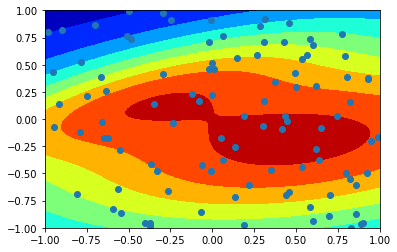

In [10]:
fig, axe = plt.subplots()
axe.contourf(X, Y, Z, cmap="jet")
axe.scatter(x, y)

In [11]:
df = pd.DataFrame({"x": x, "y": y, "z": z})

In [12]:
cross = df.merge(df, how="cross", suffixes=("_1", "_2"))

In [13]:
cross["d"] = np.sqrt((cross["x_1"] - cross["x_2"])**2 + (cross["y_1"] - cross["y_2"])**2)

In [14]:
cross["g"] = 0.5 * (cross["z_1"] - cross["z_2"])**2

In [15]:
cross

,x_1,y_1,z_1,x_2,y_2,z_2,d,g
0,0.859232,-0.608410,0.385745,0.859232,-0.608410,0.385745,0.000000,0.000000e+00
1,0.859232,-0.608410,0.385745,-0.367249,-0.410997,0.422237,1.242267,6.658355e-04
2,0.859232,-0.608410,0.385745,-0.632162,0.254000,0.399762,1.722791,9.824522e-05
3,0.859232,-0.608410,0.385745,-0.590879,-0.827554,0.295573,1.466577,4.065440e-03
4,0.859232,-0.608410,0.385745,0.135450,-0.714110,0.386501,0.731460,2.863870e-07
...,...,...,...,...,...,...,...,...
9995,-0.914569,0.136567,0.363094,0.821451,-0.552660,0.411522,1.867833,1.172637e-03
9996,-0.914569,0.136567,0.363094,-0.327890,-0.475651,0.417361,0.847941,1.472450e-03
9997,-0.914569,0.136567,0.363094,0.652761,-0.086261,0.497375,1.583091,9.015751e-03
9998,-0.914569,0.136567,0.363094,0.796201,-0.500146,0.432630,1.825415,2.417641e-03


In [20]:
bins = np.arange(0., 3.1, 0.125)
centers = bins[:-1] + np.diff(bins)/2

In [21]:
cross["dbin"] = pd.cut(cross["d"], bins=bins, right=False, labels=centers)

<Axes: xlabel='dbin'>

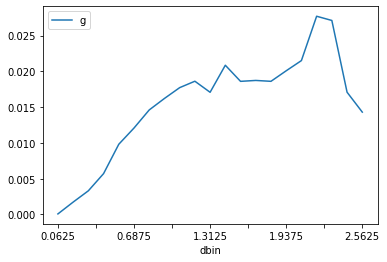

In [22]:
cross.groupby("dbin").agg({"g": "mean"}).plot()

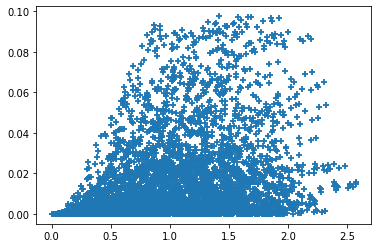

In [19]:
fig, axe = plt.subplots()
axe.scatter(cross["d"], cross["g"], marker='+')